In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/kaggle/input/dataset/dataset_14_Real Estate Transactions.csv')
data.head()

In [7]:
data.info()
data.describe()
data.isnull().sum()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


Index(['Date', 'Product', 'Region', 'Customer_Type', 'Quantity', 'Price',
       'Discount', 'Revenue'],
      dtype='object')

In [8]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.drop_duplicates(inplace=True)
print("After Cleaning:")
print(data.info())

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
None


In [9]:
most_ordered_items = data['Product'].value_counts()
print("Most Ordered Items:\n", most_ordered_items.head())

revenue_by_product = data.groupby('Product')['Revenue'].sum()
print("Revenue by Product:\n", revenue_by_product)

data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
orders_over_time = data.groupby(data['Date'].dt.date).size()
print("Orders Over Time:\n", orders_over_time)

Most Ordered Items:
 Product
Condo        363
House        343
Apartment    294
Name: count, dtype: int64
Revenue by Product:
 Product
Apartment    4.314579e+08
Condo        4.725478e+08
House        4.945777e+08
Name: Revenue, dtype: float64
Orders Over Time:
 Date
2024-01-01    5
2024-01-02    3
2024-01-03    6
2024-01-04    6
2024-01-05    2
             ..
2024-12-27    1
2024-12-28    3
2024-12-29    2
2024-12-30    1
2024-12-31    3
Length: 342, dtype: int64


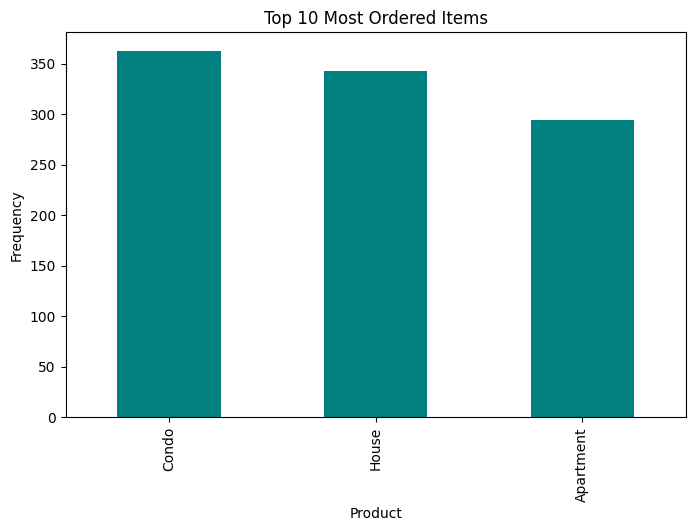

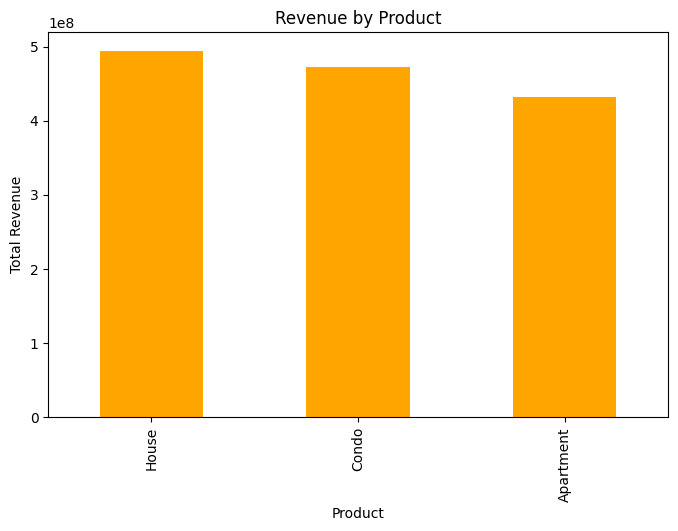

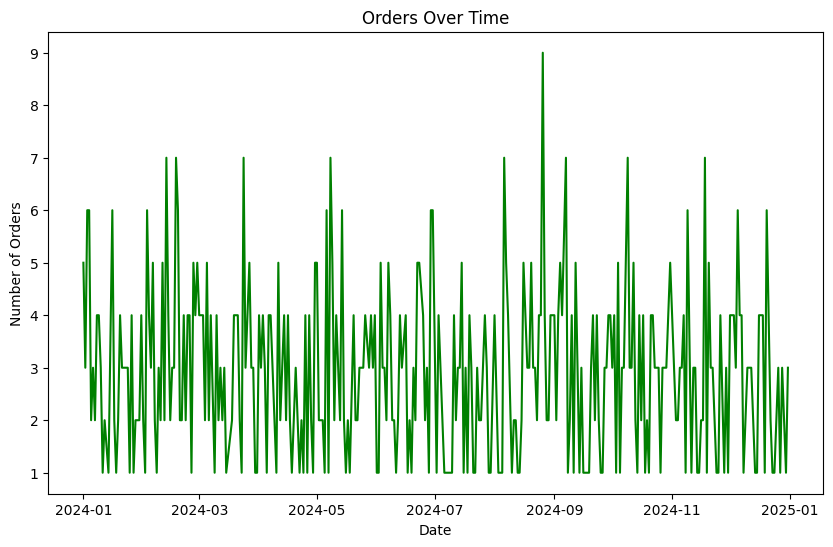

In [10]:
most_ordered_items.head(10).plot(kind='bar', figsize=(8, 5), color='teal')
plt.title("Top 10 Most Ordered Items")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.show()


revenue_by_product = data.groupby('Product')['Revenue'].sum()
revenue_by_product.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()


orders_over_time.plot(figsize=(10, 6), color='green')
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
print("Conclusions:")
print("- Most ordered products are likely the most popular or in demand.")
print("- Products generating the highest revenue could indicate profitable areas.")
print("- Trends in orders over time could help with demand forecasting and planning.")